In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

country = pd.read_csv("/Users/schoolsoftware/Documents/wd/DATA613/hw-09-python-Ryo-TANAKA-programmer/dt/country.csv") 
fer = pd.read_csv("/Users/schoolsoftware/Documents/wd/DATA613/hw-09-python-Ryo-TANAKA-programmer/dt/fertility.csv")
life_exp = pd.read_csv("/Users/schoolsoftware/Documents/wd/DATA613/hw-09-python-Ryo-TANAKA-programmer/dt/life_exp.csv")
pop = pd.read_csv("/Users/schoolsoftware/Documents/wd/DATA613/hw-09-python-Ryo-TANAKA-programmer/dt/population.csv")


In [3]:
country

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
258,XKX,Europe & Central Asia,Lower middle income,Kosovo
259,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,Zambia


In [4]:
years_range = ["1960", "1961", "1962", "1963", "1964", "1965", "1966", "1967", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989", "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"]

In [5]:
new_life_exp = pd.melt(life_exp, id_vars = ["Country Name", "Country Code"], var_name = "year", value_name = "life_exp")

In [6]:

new_pop = pd.melt(pop, id_vars = ["Country Name", "Country Code"], var_name = "year", value_name = "pop")

In [7]:
new_fer = pd.melt(fer, id_vars = ["Country Name", "Country Code"], var_name = "year", value_name = "fer_rate")



In [8]:
new_fer

,Country Name,Country Code,year,fer_rate
0,Aruba,ABW,1960,4.820
1,Afghanistan,AFG,1960,7.450
2,Angola,AGO,1960,7.478
3,Albania,ALB,1960,6.489
4,Andorra,AND,1960,NaN
...,...,...,...,...
15571,Kosovo,XKX,2018,NaN
15572,"Yemen, Rep.",YEM,2018,NaN
15573,South Africa,ZAF,2018,NaN
15574,Zambia,ZMB,2018,NaN


In [9]:

fer_life = pd.merge(left = new_fer, right = new_life_exp, how = "left", on = ["Country Code","year"])
pop_fer_life = pd.merge(left = fer_life, right = new_pop, how = "left", on = ["Country Code","year"])
new_df = pd.merge(left = pop_fer_life, right = country, how = "left", on = ["Country Code"])
new_df = new_df.drop(["IncomeGroup","TableName"], axis = 1)
new_df = new_df.rename({"pop":"population"}, axis = 1)
new_df["year"] = pd.to_numeric(new_df["year"])
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15576 entries, 0 to 15575
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name_x  15576 non-null  object 
 1   Country Code    15576 non-null  object 
 2   year            15576 non-null  int64  
 3   fer_rate        14016 non-null  float64
 4   Country Name_y  15576 non-null  object 
 5   life_exp        13997 non-null  float64
 6   Country Name    15576 non-null  object 
 7   population      15147 non-null  float64
 8   Region          12803 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 1.2+ MB


In [10]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [11]:

plot_datadf = new_df.query("(year == 1960) | (year == 1970) | (year == 1980) | (year == 1990) | (year == 2000) | (year == 2010)")
plt.clf()

<Figure size 640x480 with 0 Axes>

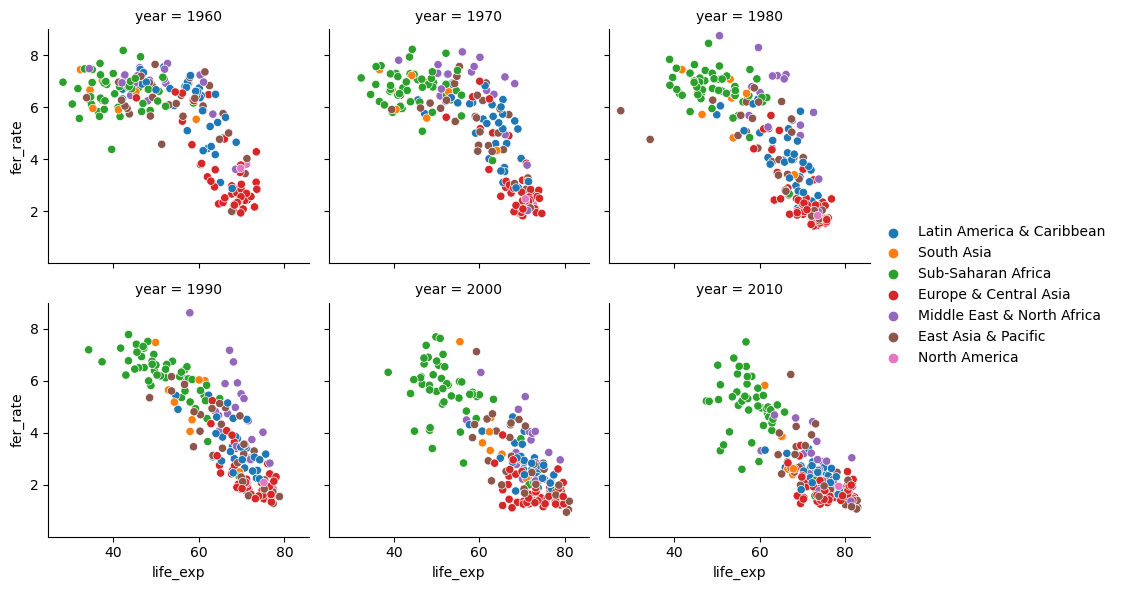

In [12]:

g = sns.FacetGrid(data = plot_datadf, col = "year", col_wrap = 3, legend_out = True)
g.map_dataframe(sns.scatterplot, x = "life_exp", y = "fer_rate", hue = "Region")
g.set(ylim = (0, 9), xticks = [40, 60, 80], yticks = [2, 4, 6, 8])
g.add_legend(bbox_to_anchor=(1, 0.5))
plt.show()


In [13]:
lnplot_df = new_df.filter(["year","population","Region"]).groupby(["Region","year"]).sum()
lnplot_df = lnplot_df.query("(year < 2018)")

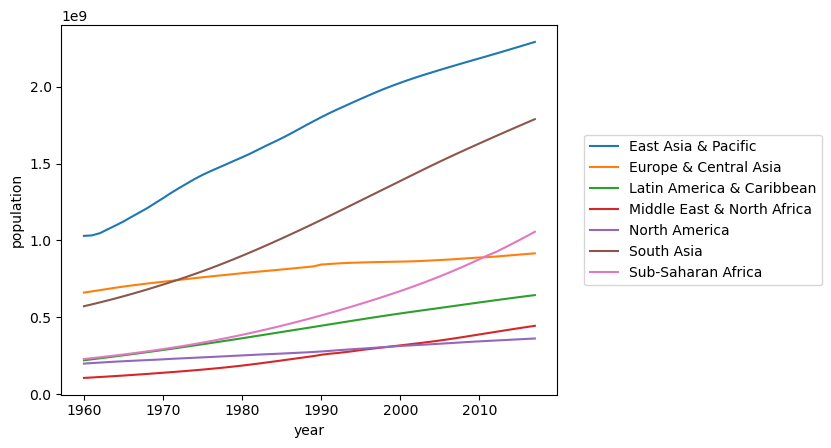

In [14]:
sns.lineplot(data = lnplot_df, x = "year", y = "population", hue = "Region")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc = "center left")
plt.show()